In [15]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alexattia_the_simpsons_characters_dataset_path = kagglehub.dataset_download('alexattia/the-simpsons-characters-dataset')

print('Data source import complete.')
print(alexattia_the_simpsons_characters_dataset_path)  # Check where it's stored

Data source import complete.
/root/.cache/kagglehub/datasets/alexattia/the-simpsons-characters-dataset/versions/4


In [2]:
!pip install caer canaro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.0 MB/s eta 0:00:00


In [3]:
import os
import caer
import numpy as np
import cv2
import gc
import canaro
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


In [21]:
IMG_SIZE = (80,80)
channels = 1 # grayscale
char_path = "/root/.cache/kagglehub/datasets/alexattia/the-simpsons-characters-dataset/versions/4/simpsons_dataset"

In [23]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))
# sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('simpsons_dataset', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('gil', 27),
 ('fat_

In [24]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >=10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [25]:
# create trainig data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.005423069000244141s
[INFO] At 1000 files
[INFO] 1454 files found in 0.0028519630432128906s
[INFO] At 1000 files
[INFO] 1452 files found in 0.0028078556060791016s
[INFO] At 1000 files
[INFO] 1354 files found in 0.003920555114746094s
[INFO] At 1000 files
[INFO] 1342 files found in 0.0024733543395996094s
[INFO] At 1000 files
[INFO] 1291 files found in 0.002406597137451172s
[INFO] At 1000 files
[INFO] 1206 files found in 0.0022916793823242188s
[INFO] At 1000 files
[INFO] 1194 files found in 0.002376556396484375s
[INFO] At 1000 files
[INFO] 1193 files found in 0.002313852310180664s
[INFO] At 1000 files
[INFO] 1079 files found in 0.0020644664764404297s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 18s


In [26]:
len(train)

13811

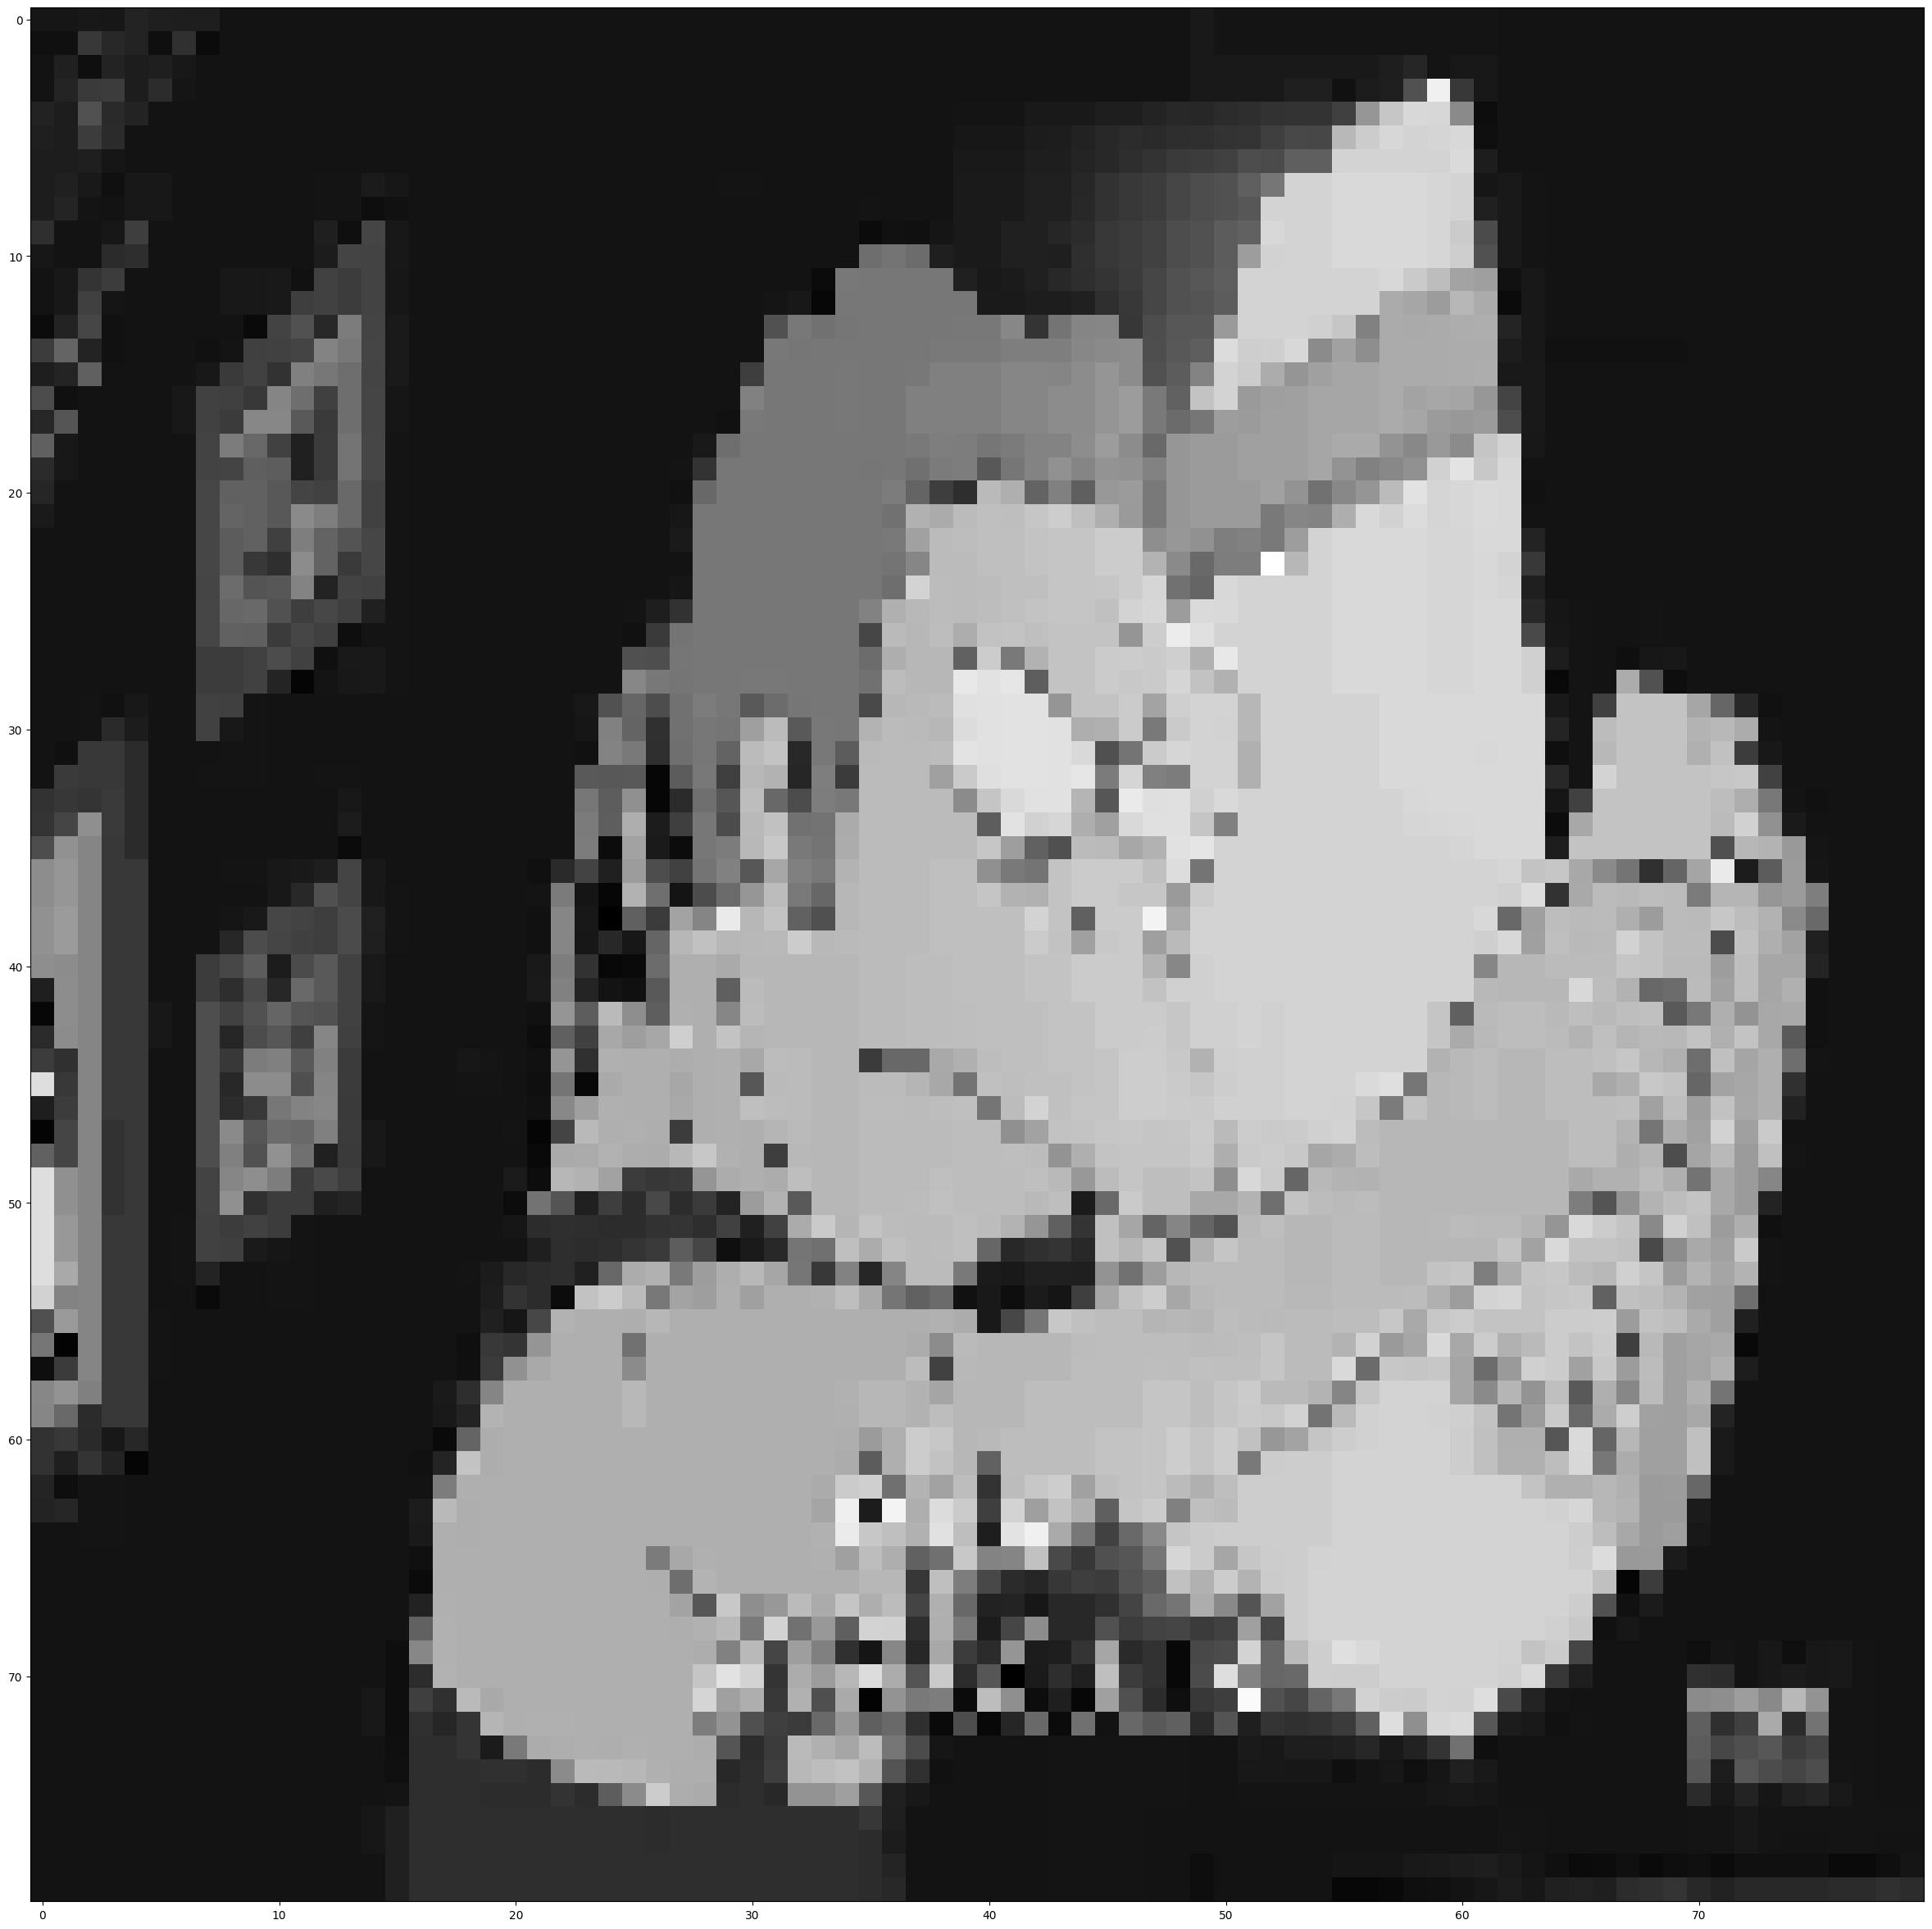

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [28]:
featureSet, labels = caer.sep_train(train, IMG_SIZE = IMG_SIZE)

In [29]:
from tensorflow.keras.utils import to_categorical
# normalise the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [30]:
X_train,X_test, y_train, y_test = caer.train_val_split(featureSet, labels, val_ratio=2)

In [31]:
del train
del featureSet
del labels
gc.collect()

0

In [32]:
BATCH_SIZE = 32
EPOCHS = 10

In [33]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)  # Should not be (0,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape X_train to include channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# ImageDataGenerator
datagen = ImageDataGenerator()
train_gen = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)


In [35]:
print(f"IMG_SIZE: {IMG_SIZE}, Type: {type(IMG_SIZE)}")
print(f"channels: {channels}, Type: {type(channels)}")


IMG_SIZE: (80, 80), Type: <class 'tuple'>
channels: 1, Type: <class 'int'>


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer

# Define model with correct input shape
model = Sequential([
    InputLayer(input_shape=(*IMG_SIZE, channels)),  # Corrected input shape
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(characters), activation='softmax')
])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 78, 78, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 39, 39, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,313,802 (81.31 MB)

 Trainable params: 21,313,802 (81.31 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [38]:
from tensorflow.keras.optimizers import Adam

# Define the optimizer
optimizer = Adam(learning_rate=0.001)  # You can change the learning rate if needed

# Compile the model
model.compile(
    loss="categorical_crossentropy",  # Use categorical_crossentropy for multi-class classification
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [39]:
import tensorflow as tf
import numpy as np

# Resize images to (80, 80)
X_train_resized = np.array([cv2.resize(img, (80, 80)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (80, 80)) for img in X_test])

# Reshape after resizing
X_train_resized = X_train_resized.reshape(-1, 80, 80, 1)
X_test_resized = X_test_resized.reshape(-1, 80, 80, 1)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

# Convert to NumPy array
X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)

print("X_train_resized shape:", X_train_resized.shape)  # Expected: (60000, 80, 80, 1)
print("y_train_onehot shape:", y_train_onehot.shape)  # Expected: (60000, 10)
print("X_test_resized shape:", X_test_resized.shape)  # Expected: (10000, 80, 80, 1)
print("y_test_onehot shape:", y_test_onehot.shape)  # Expected: (10000, 10)

X_train_resized shape: (60000, 80, 80, 1)
y_train_onehot shape: (60000, 10)
X_test_resized shape: (10000, 80, 80, 1)
y_test_onehot shape: (10000, 10)


In [40]:
from tensorflow.keras.utils import to_categorical

# Convert y_train to one-hot encoding (assuming 10 classes)
y_train_onehot = to_categorical(y_train, num_classes=10)

print(y_train_onehot.shape)  # Should be (60000, 10)


(60000, 10)


In [41]:
print("Original y_test shape:", y_test.shape)  # Expected: (13811,)


Original y_test shape: (10000,)


In [42]:
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 78, 78, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 39, 39, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,313,802 (81.31 MB)

 Trainable params: 21,313,802 (81.31 MB)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Train the model
training = model.fit(
    X_train_resized, y_train_onehot,
    batch_size=32,
    epochs=5,  # Increased epochs to allow LR reduction to take effect
    validation_data=(X_test_resized, y_test_onehot),
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9173 - loss: 0.2646 - val_accuracy: 0.9796 - val_loss: 0.0607
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9819 - loss: 0.0600 - val_accuracy: 0.9838 - val_loss: 0.0486
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9873 - loss: 0.0387 - val_accuracy: 0.9865 - val_loss: 0.0414
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9903 - loss: 0.0291 - val_accuracy: 0.9883 - val_loss: 0.0429
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9918 - loss: 0.0239 - val_accuracy: 0.9888 - val_loss: 0.0369


In [44]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

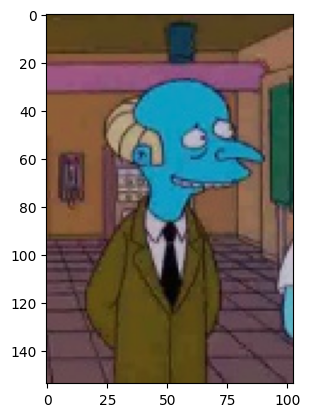

In [80]:
import cv2 as cv
test_path = r"/root/.cache/kagglehub/datasets/alexattia/the-simpsons-characters-dataset/versions/4/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg"
img = cv.imread(test_path)
plt.imshow(img)
plt.show()

In [81]:
def prepare(img):
    # img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, IMG_SIZE)
    img =  caer.reshape(img, IMG_SIZE, 1)
    return img

In [78]:
predictions = model.predict(prepare(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [82]:
print(characters[np.argmax(predictions[0])])

charles_montgomery_burns
